In [7]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow
!pip install transformers torch

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [8]:
# import libraries
from transformers import BartTokenizer, BartForConditionalGeneration
from IPython.display import display
from transformers import pipeline
from PIL import Image
import pytesseract
import re
import os

In [9]:
# load image
image_path = "/content/test.jpg"  # image path
image = Image.open(image_path)

In [10]:
# Perform OCR
ocr_text = pytesseract.image_to_string(image)
ocr_text_clean = re.sub(r'[\n\f]+', ' ', ocr_text).strip() # clean text

In [15]:
# Tokenize the input text and count the number of tokens
# This helps to set max_length dynamically for the summarization model
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

# Tokenize input
input_tokens = tokenizer.encode(ocr_text_clean, return_tensors="pt")
num_input_tokens = input_tokens.shape[1]
print("Number of input tokens:", num_input_tokens)

Number of input tokens: 265


In [16]:
#Summarize
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=0)

summary = summarizer(ocr_text_clean, max_length=num_input_tokens, min_length=20, do_sample=False)[0]['summary_text']

Device set to use cpu


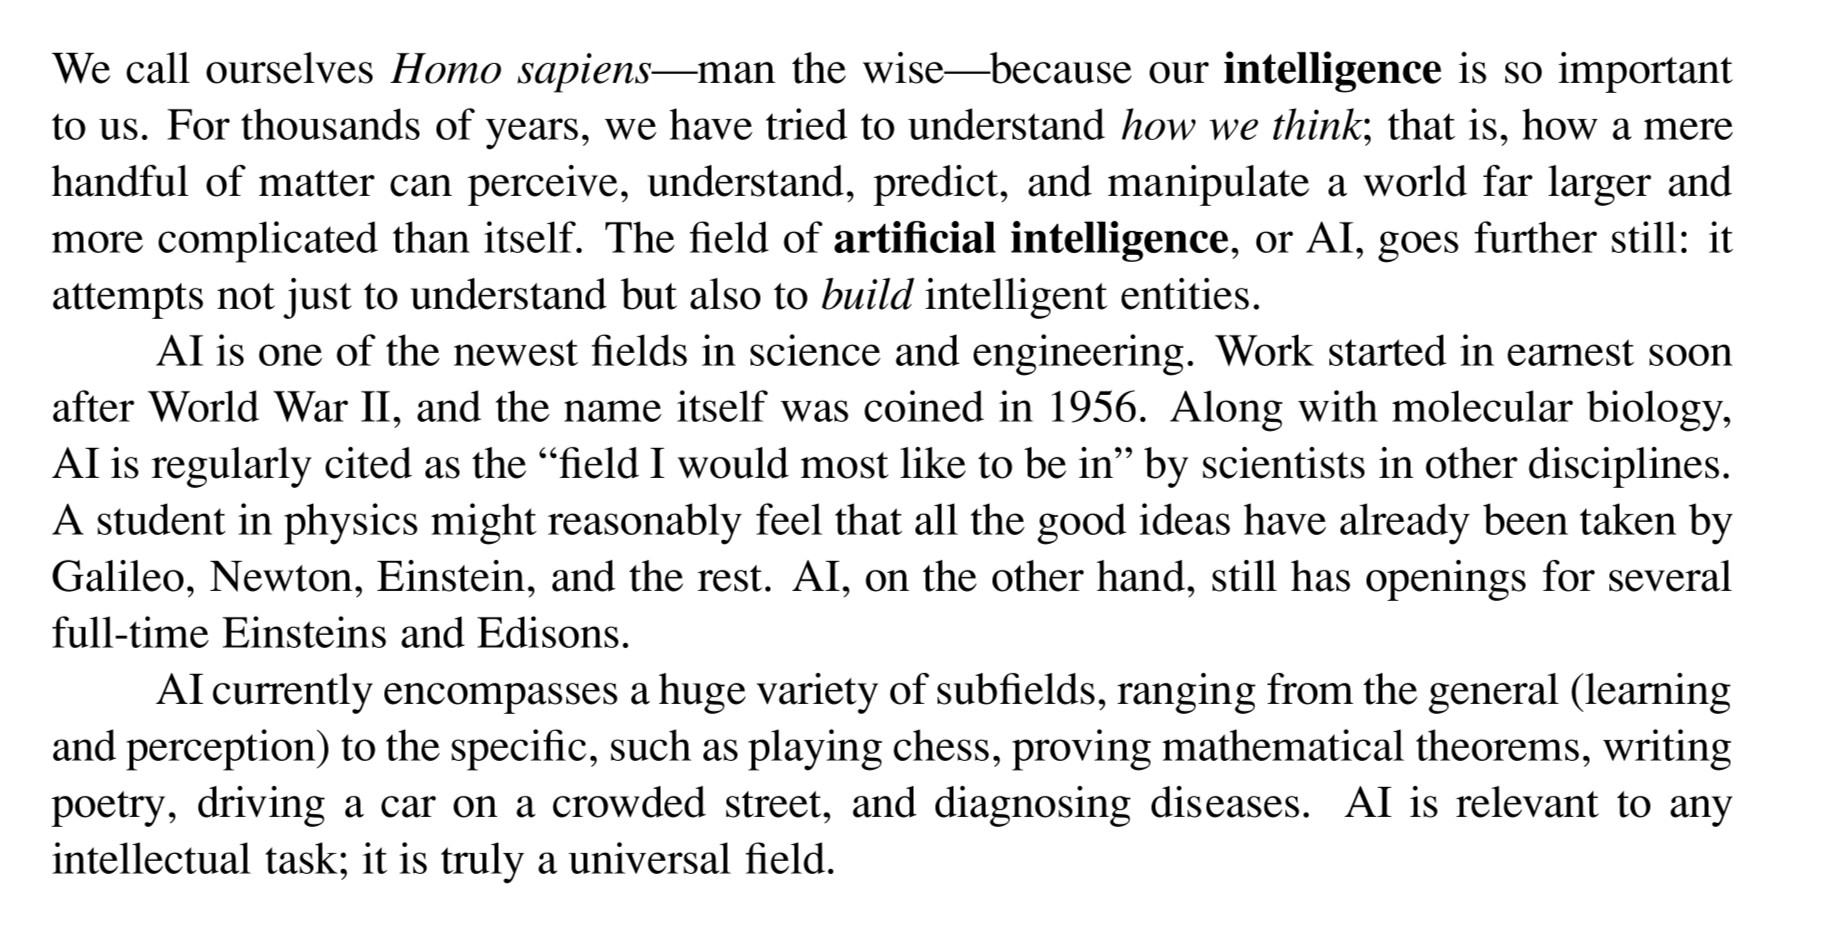


📝 OCR Output:

We call ourselves Homo sapiens—man the wise—because our intelligence is so important
to us. For thousands of years, we have tried to understand how we think; that is, how a mere
handful of matter can perceive, understand, predict, and manipulate a world far larger and
more complicated than itself. The field of artificial intelligence, or AI, goes further still: it
attempts not just to understand but also to build intelligent entities.

AI is one of the newest fields in science and engineering. Work started in earnest soon
after World War II, and the name itself was coined in 1956. Along with molecular biology,
Al is regularly cited as the “field I would most like to be in” by scientists in other disciplines.
A student in physics might reasonably feel that all the good ideas have already been taken by
Galileo, Newton, Einstein, and the rest. AI, on the other hand, still has openings for several
full-time Einsteins and Edisons.

Alcurrently encompasses a huge variety of s

In [17]:
# Display result
display(image)
print("\n📝 OCR Output:\n")
print(ocr_text)
print("\n🔍 Summary:\n")
print(summary)